In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đường dẫn tới tệp .bin của bạn
file_path = '1.bin'

# Đọc dữ liệu từ tệp .bin
with open(file_path, 'rb') as file:
    # Đọc toàn bộ nội dung của tệp .bin
    data = file.read()

# Chuyển đổi dữ liệu thành mảng numpy
# Giả sử mỗi điểm trong tệp .bin được lưu trữ dưới dạng 3 giá trị float liên tiếp (x, y, z)
# Thay đổi định dạng dữ liệu và sắp xếp nó theo cấu trúc của tệp .bin của bạn
point_cloud_data = np.frombuffer(data, dtype=np.float32).reshape(-1, 3)

# Tiền xử lý dữ liệu: chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(point_cloud_data)

# Xử lý giá trị thiếu bằng cách điền giá trị trung bình
imputer = SimpleImputer()
scaled_data = imputer.fit_transform(scaled_data)

# Thiết lập các tham số DBSCAN
eps = 0.2  # Khoảng cách tối đa giữa hai mẫu để được coi là cùng một vùng lân cận
min_samples = 10  # Số lượng mẫu tối thiểu trong một vùng lân cận để một điểm được coi là một điểm cốt lõi

# Áp dụng thuật toán DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_data)

# Lấy nhãn gom cụm được gán bởi thuật toán DBSCAN
labels = dbscan.labels_

# Phân tích kết quả
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1  # Số lượng cụm (loại trừ điểm nhiễu)
num_noise_points = np.sum(labels == -1)  # Số lượng điểm nhiễu

# Hiển thị kết quả gom cụm dữ liệu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points in each cluster with a different color
for label in unique_labels:
    if label == -1:  # noise points
        ax.scatter3D(point_cloud_data[labels == label, 0],
                     point_cloud_data[labels == label, 1],
                     point_cloud_data[labels == label, 2],
                     c='black', label='Noise')
    else:
        ax.scatter3D(point_cloud_data[labels == label, 0],
                     point_cloud_data[labels == label, 1],
                     point_cloud_data[labels == label, 2],
                     label=f'Cluster {label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:987: RuntimeWarning: invalid value encountered in subtract
  temp = X - T
c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:994: RuntimeWarning: overflow encountered in subtract
  X -= self.mean_
c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:994: RuntimeWarning: invalid value encountered in subtract
  X -= self.mean_


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [1]:
import pandas as pd

In [3]:
ds = pd.read_excel("data_guita.xlsx")

In [4]:
ds

,year,temag,temst,rfag,rfst
0,1981,27.44,27.23,1297.27,1671.68
1,1982,28.84,27.86,295.31,279.49
2,1983,28.14,27.44,1149.61,1608.40
3,1984,27.68,27.09,891.21,1070.51
4,1985,28.05,27.23,638.09,706.64
5,1986,27.66,26.99,1081.05,1128.52
6,1987,28.69,28.05,574.80,358.59
7,1988,29.03,28.01,511.52,337.50
8,1989,27.69,27.07,1255.08,1297.27
9,1990,27.87,27.34,1191.80,1133.79


In [6]:
import seaborn as sns

<AxesSubplot: xlabel='year', ylabel='rfst'>

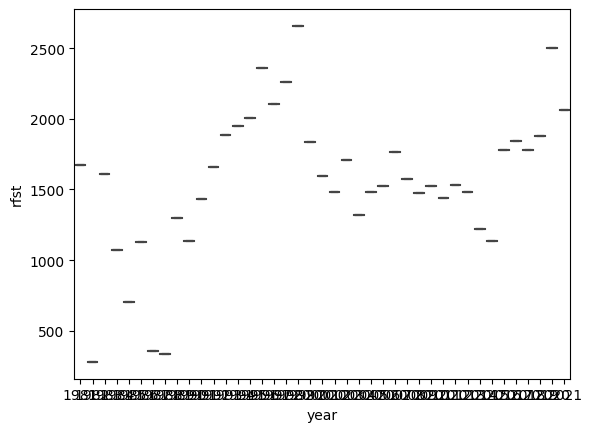

In [9]:
sns.boxplot(x = ds['year'], y = ds['rfst'])

In [10]:
import matplotlib.pyplot as plt

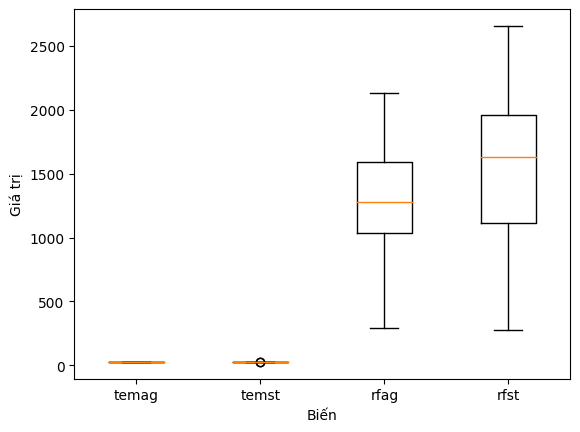

In [14]:
fig, ax = plt.subplots()

# Vẽ biểu đồ boxplot
box = ax.boxplot(data.values(), labels=data.keys())

# Đặt tên cho trục x và trục y
ax.set_xlabel('Biến')
ax.set_ylabel('Giá trị')

# Hiển thị biểu đồ boxplot
plt.show()

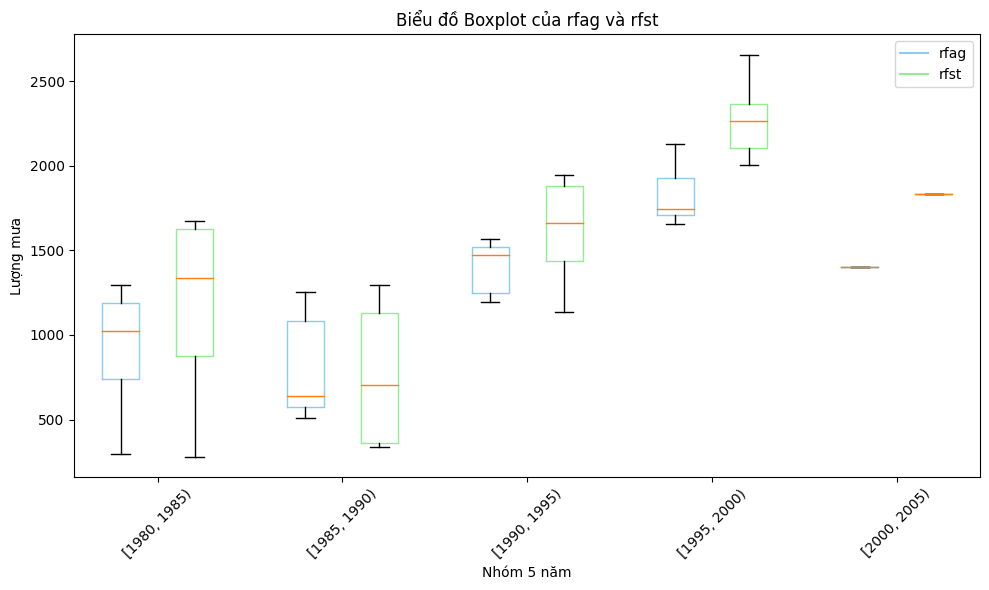

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
data = {
    'year': [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
    'rfag': [1297.27, 295.31, 1149.61, 891.21, 638.09, 1081.05, 574.8, 511.52, 1255.08, 1191.8, 1471.29, 1566.21, 1518.75, 1249.8, 1708.59, 1930.08, 1655.86, 2130.47, 1745.51, 1402.73],
    'rfst': [1671.68, 279.49, 1608.4, 1070.51, 706.64, 1128.52, 358.59, 337.5, 1297.27, 1133.79, 1434.38, 1661.13, 1882.62, 1945.9, 2003.91, 2362.5, 2104.1, 2262.3, 2657.81, 1835.16]
}

df = pd.DataFrame(data)

# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df['year'], bins=range(1980, 2006, 5), right=False)

# Tạo hình boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Tạo danh sách lượng mưa của từng nhóm
rainfall_rfag = [df[df['year_group'] == group]['rfag'] for group in df['year_group'].unique()]
rainfall_rfst = [df[df['year_group'] == group]['rfst'] for group in df['year_group'].unique()]

# Ghép hai boxplot vào cùng một hình
positions_rfag = np.array(range(len(rainfall_rfag)))*2.0-0.4
positions_rfst = np.array(range(len(rainfall_rfst)))*2.0+0.4

box_rfag = ax.boxplot(rainfall_rfag, positions=positions_rfag, sym='', widths=0.4)
box_rfst = ax.boxplot(rainfall_rfst, positions=positions_rfst, sym='', widths=0.4)

for box in box_rfag['boxes']:
    box.set(color='skyblue')
for box in box_rfst['boxes']:
    box.set(color='lightgreen')

# Đặt nhãn và tiêu đề cho trục x
ax.set_xticks((positions_rfag + positions_rfst) / 2)
ax.set_xticklabels(df['year_group'].unique(), rotation=45)
ax.set_xlabel('Nhóm 5 năm')
ax.set_ylabel('Lượng mưa')
ax.set_title('Biểu đồ Boxplot của rfag và rfst')

# Tạo legend cho biểu đồ
box_rfag = plt.Line2D([], [], color='skyblue', label='rfag')
box_rfst = plt.Line2D([], [], color='lightgreen', label='rfst')
plt.legend(handles=[box_rfag, box_rfst])

plt.tight_layout()
plt.show()



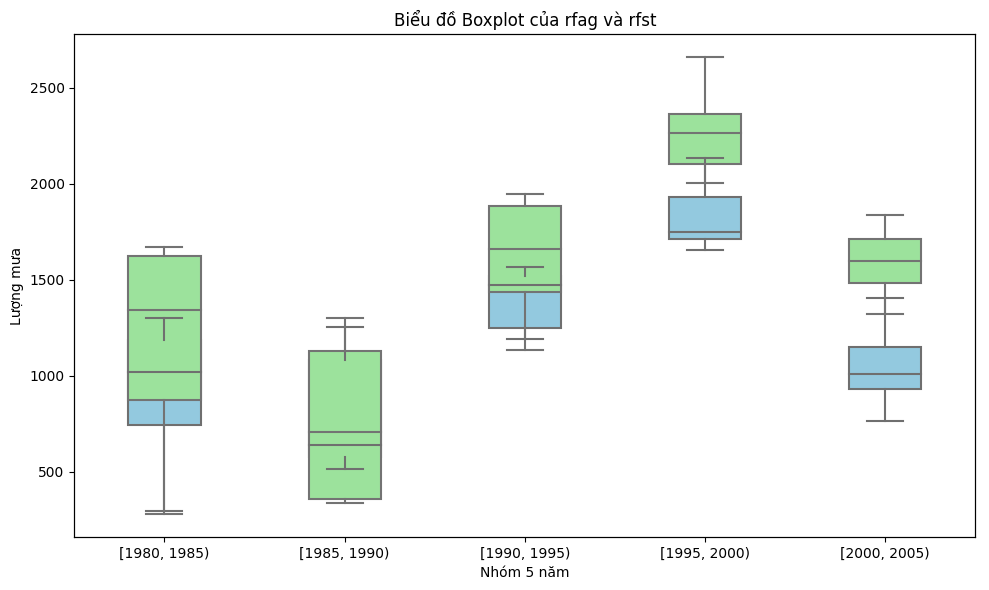

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data_guita.xlsx")


# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df['year'], bins=range(1980, 2006, 5), right=False)

# Tạo hình boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Biểu đồ boxplot cho rfag
sns.boxplot(x='year_group', y='rfag', data=df, color='skyblue', ax=ax, width=0.4)

# Biểu đồ boxplot cho rfst
sns.boxplot(x='year_group', y='rfst', data=df, color='lightgreen', ax=ax, width=0.4)

# Điều chỉnh vị trí của biểu đồ rfst
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())

# Loại bỏ các ytick, yticklabel của ax2
ax2.set_yticks([])
ax2.set_yticklabels([])

# Đặt nhãn và tiêu đề cho trục x, y
ax.set_xlabel('Nhóm 5 năm')
ax.set_ylabel('Lượng mưa')
ax.set_title('Biểu đồ Boxplot của rfag và rfst')

plt.tight_layout()
plt.show()


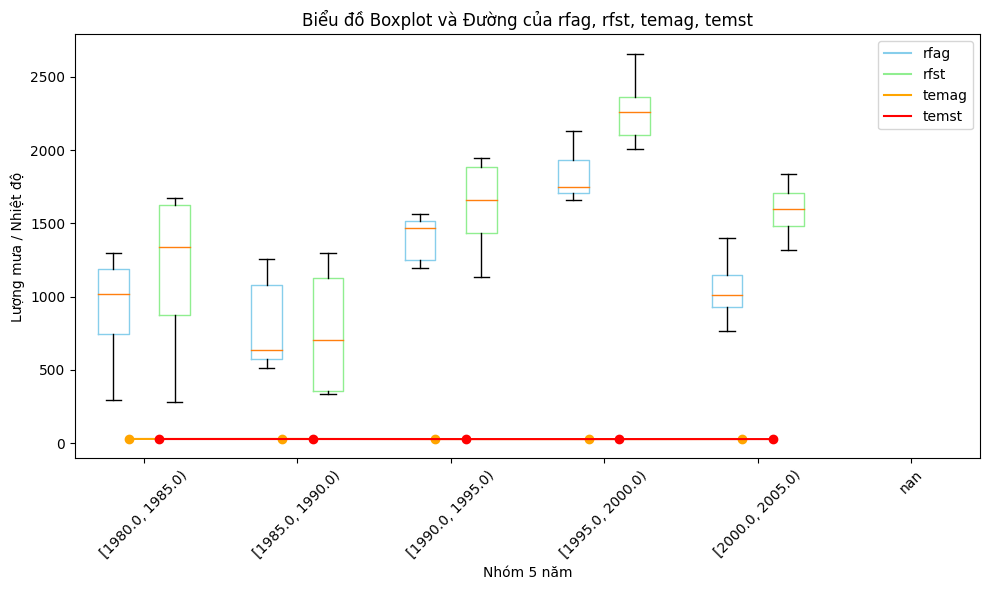

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
data = {
    'year': [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
    'rfag': [1297.27, 295.31, 1149.61, 891.21, 638.09, 1081.05, 574.8, 511.52, 1255.08, 1191.8, 1471.29, 1566.21, 1518.75, 1249.8, 1708.59, 1930.08, 1655.86, 2130.47, 1745.51, 1402.73],
    'rfst': [1671.68, 279.49, 1608.4, 1070.51, 706.64, 1128.52, 358.59, 337.5, 1297.27, 1133.79, 1434.38, 1661.13, 1882.62, 1945.9, 2003.91, 2362.5, 2104.1, 2262.3, 2657.81, 1835.16],
    'temag': [27.44, 28.84, 28.14, 27.68, 28.05, 27.66, 28.69, 29.03, 27.69, 27.87, 27.6, 27.45, 27.27, 27.44, 27.48, 26.98, 26.98, 28.22, 26.46, 27.08],
    'temst': [27.23, 27.86, 27.44, 27.09, 27.23, 26.99, 28.05, 28.01, 27.07, 27.34, 27.15, 27.11, 26.92, 26.87, 27.03, 26.76, 27.1, 27.83, 26.69, 26.88]
}

df = pd.DataFrame(data)

# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df['year'], bins=range(1980, 2006, 5), right=False)

# Tạo hình boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Tạo danh sách lượng mưa của từng nhóm
rainfall_rfag = [df[df['year_group'] == group]['rfag'] for group in df['year_group'].unique()]
rainfall_rfst = [df[df['year_group'] == group]['rfst'] for group in df['year_group'].unique()]

# Tạo danh sách nhiệt độ của từng nhóm
temperature_temag = [df[df['year_group'] == group]['temag'] for group in df['year_group'].unique()]
temperature_temst = [df[df['year_group'] == group]['temst'] for group in df['year_group'].unique()]

# Ghép hai boxplot vào cùng một hình
positions_rfag = np.array(range(len(rainfall_rfag)))*2.0-0.4
positions_rfst = np.array(range(len(rainfall_rfst)))*2.0+0.4

box_rfag = ax.boxplot(rainfall_rfag, positions=positions_rfag, sym='', widths=0.4)
box_rfst = ax.boxplot(rainfall_rfst, positions=positions_rfst, sym='', widths=0.4)

for box in box_rfag['boxes']:
    box.set(color='skyblue')
for box in box_rfst['boxes']:
    box.set(color='lightgreen')

# Ghép hai đường vào cùng một hình
positions_temag = np.array(range(len(temperature_temag)))*2.0-0.2
positions_temst = np.array(range(len(temperature_temst)))*2.0+0.2

line_temag = ax.plot(positions_temag, [np.mean(tem) for tem in temperature_temag], '-o', color='orange', label='temag')
line_temst = ax.plot(positions_temst, [np.mean(tem) for tem in temperature_temst], '-o', color='red', label='temst')

# Đặt nhãn và tiêu đề cho trục x
ax.set_xticks((positions_rfag + positions_rfst) / 2)
ax.set_xticklabels(df['year_group'].unique(), rotation=45)
ax.set_xlabel('Nhóm 5 năm')
ax.set_ylabel('Lượng mưa / Nhiệt độ')
ax.set_title('Biểu đồ Boxplot và Đường của rfag, rfst, temag, temst')

# Tạo legend cho biểu đồ
box_rfag = plt.Line2D([], [], color='skyblue', label='rfag')
box_rfst = plt.Line2D([], [], color='lightgreen', label='rfst')
line_temag = plt.Line2D([], [], color='orange', label='temag')
line_temst = plt.Line2D([], [], color='red', label='temst')
plt.legend(handles=[box_rfag, box_rfst, line_temag, line_temst])

plt.tight_layout()
plt.show()

c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\anhng\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


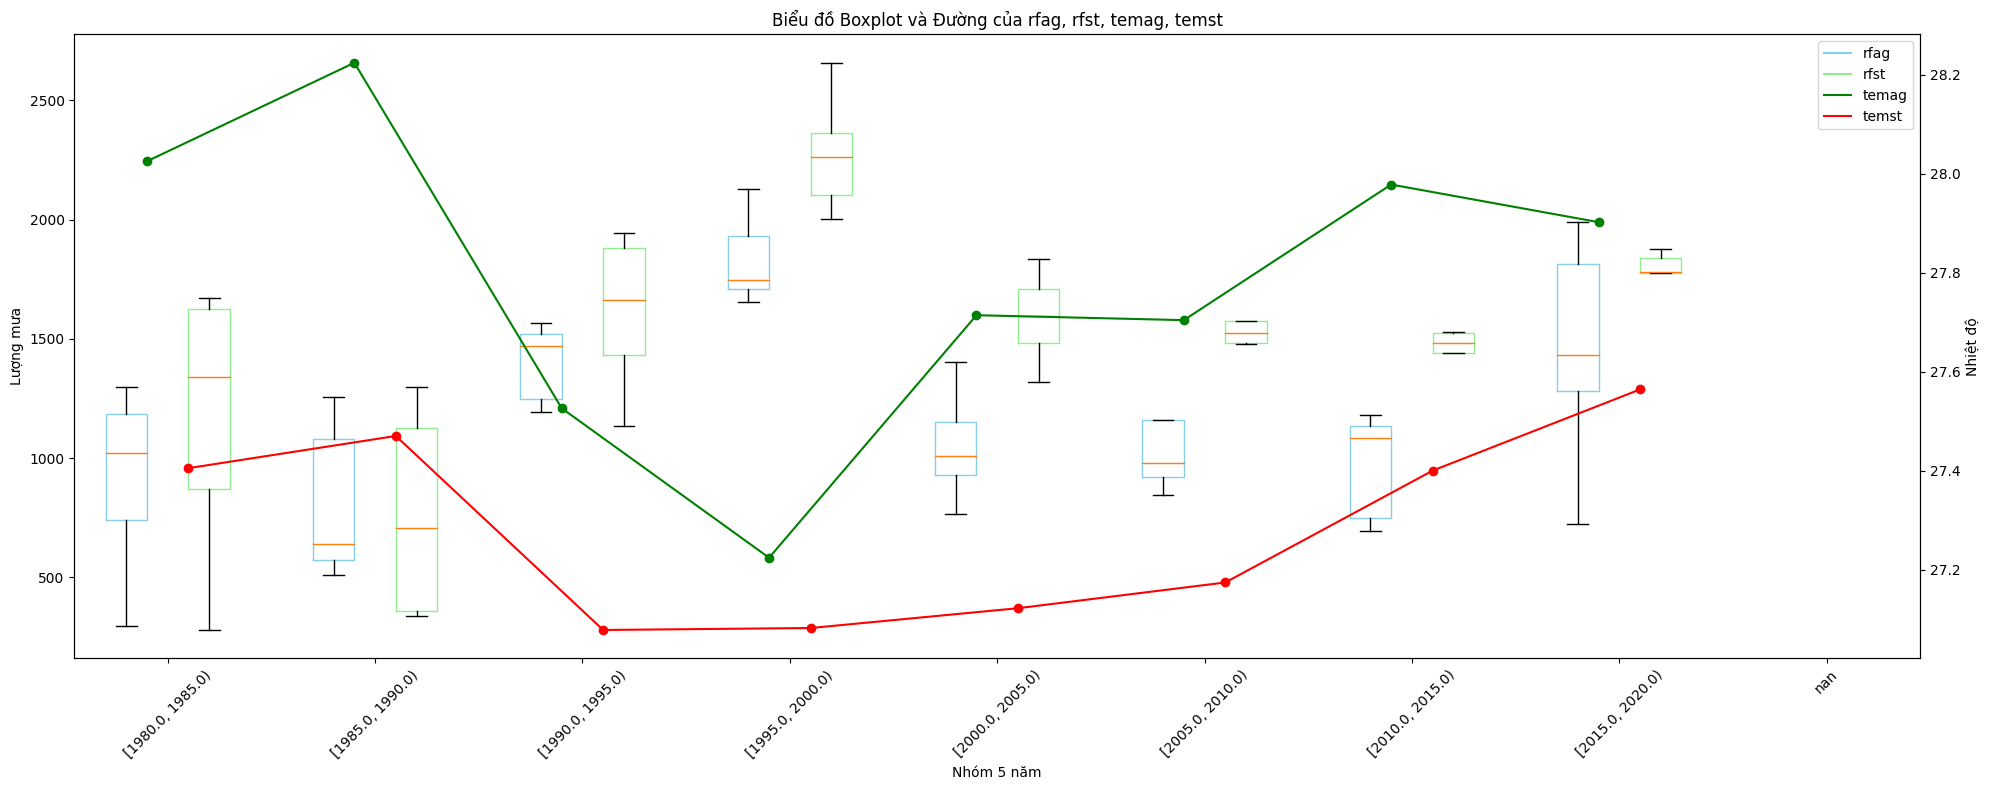

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
df = pd.read_excel("data_guita.xlsx")

# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df['year'], bins=range(1980, 2022, 5), right=False, include_lowest=True)


# Tạo hình boxplot
fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()  # Tạo trục y phụ

# Tạo danh sách lượng mưa của từng nhóm
rainfall_rfag = [df[df['year_group'] == group]['rfag'].values for group in df['year_group'].unique()]
rainfall_rfst = [df[df['year_group'] == group]['rfst'].values for group in df['year_group'].unique()]

# Tạo danh sách nhiệt độ của từng nhóm
temperature_temag = [df[df['year_group'] == group]['temag'].values for group in df['year_group'].unique()]
temperature_temst = [df[df['year_group'] == group]['temst'].values for group in df['year_group'].unique()]

# Ghép hai boxplot vào cùng một hình
positions_rfag = np.array(range(len(rainfall_rfag))) * 2.0 - 0.4
positions_rfst = np.array(range(len(rainfall_rfst))) * 2.0 + 0.4

box_rfag = ax.boxplot(rainfall_rfag, positions=positions_rfag, sym='', widths=0.4)
box_rfst = ax.boxplot(rainfall_rfst, positions=positions_rfst, sym='', widths=0.4)

for box in box_rfag['boxes']:
    box.set(color='skyblue')
for box in box_rfst['boxes']:
    box.set(color='lightgreen')

# Ghép hai đường vào cùng một hình
positions_temag = np.array(range(len(temperature_temag))) * 2.0 - 0.2
positions_temst = np.array(range(len(temperature_temst))) * 2.0 + 0.2

line_temag = ax2.plot(positions_temag, [np.mean(tem) for tem in temperature_temag], '-o', color='green', label='temag')
line_temst = ax2.plot(positions_temst, [np.mean(tem) for tem in temperature_temst], '-o', color='red', label='temst')

# Đặt nhãn và tiêu đề cho trục x
ax.set_xticks((positions_rfag + positions_rfst) / 2)
ax.set_xticklabels(df['year_group'].unique(), rotation=45)
ax.set_xlabel('Nhóm 5 năm')
ax.set_title('Biểu đồ Boxplot và Đường của rfag, rfst, temag, temst')

# Đặt nhãn cho trục y
ax.set_ylabel('Lượng mưa')
ax2.set_ylabel('Nhiệt độ')

# Tạo legend cho biểu đồ
box_rfag = plt.Line2D([], [], color='skyblue', label='rfag')
box_rfst = plt.Line2D([], [], color='lightgreen', label='rfst')
line_temag = plt.Line2D([], [], color='green', label='temag')
line_temst = plt.Line2D([], [], color='red', label='temst')
plt.legend(handles=[box_rfag, box_rfst, line_temag, line_temst])

plt.tight_layout()
plt.show()





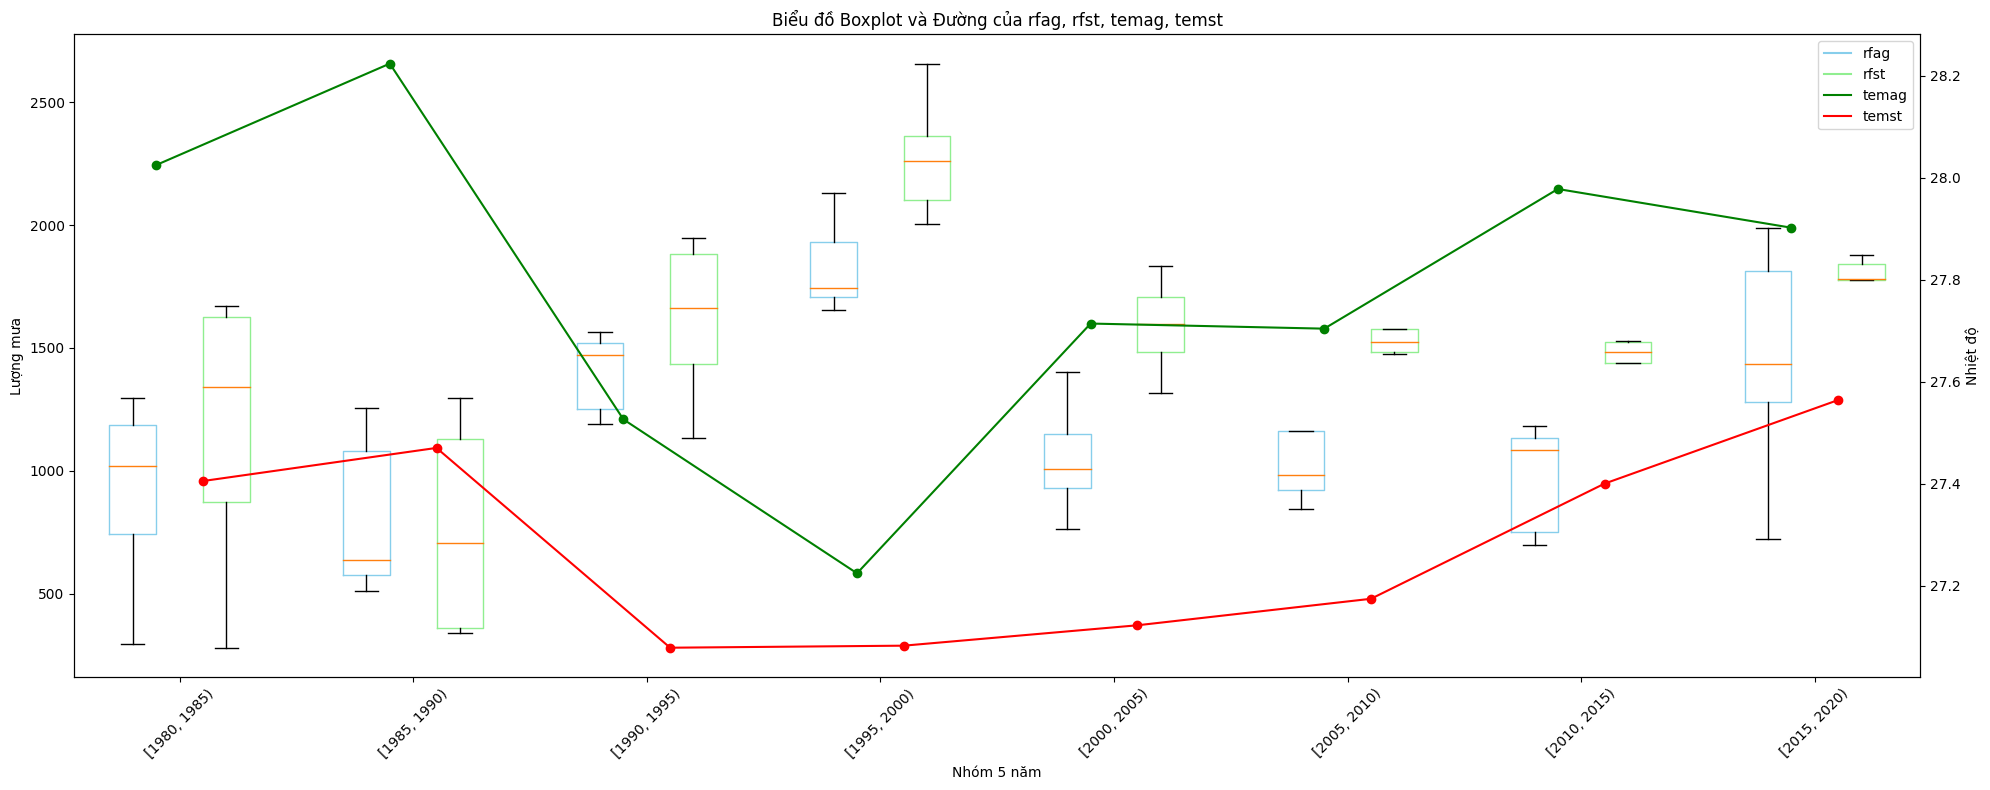

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ tệp Excel
df = pd.read_excel("data_guita.xlsx")

# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df[df['year'] <= 2021]['year'], bins=range(1980, 2022, 5), right=False)

# Xóa các dòng chứa giá trị NaN trong cột 'year_group'
df = df.dropna(subset=['year_group'])

# Tạo hình boxplot và đường
fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()

# Tạo danh sách lượng mưa của từng nhóm
rainfall_rfag = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['rfag'].values for group in df['year_group'].unique()]
rainfall_rfst = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['rfst'].values for group in df['year_group'].unique()]

# Tạo danh sách nhiệt độ của từng nhóm
temperature_temag = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['temag'].values for group in df['year_group'].unique()]
temperature_temst = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['temst'].values for group in df['year_group'].unique()]

# Vẽ boxplot
positions_rfag = np.array(range(len(rainfall_rfag))) * 2.0 - 0.4
positions_rfst = np.array(range(len(rainfall_rfst))) * 2.0 + 0.4

box_rfag = ax.boxplot(rainfall_rfag, positions=positions_rfag, sym='', widths=0.4)
box_rfst = ax.boxplot(rainfall_rfst, positions=positions_rfst, sym='', widths=0.4)

for box in box_rfag['boxes']:
    box.set(color='skyblue')
for box in box_rfst['boxes']:
    box.set(color='lightgreen')

# Vẽ đường
positions_temag = np.array(range(len(temperature_temag))) * 2.0 - 0.2
positions_temst = np.array(range(len(temperature_temst))) * 2.0 + 0.2

line_temag = ax2.plot(positions_temag, [np.mean(tem) for tem in temperature_temag], '-o', color='green', label='temag')
line_temst = ax2.plot(positions_temst, [np.mean(tem) for tem in temperature_temst], '-o', color='red', label='temst')

# Đặt nhãn và tiêu đề cho trục x
ax.set_xticks((positions_rfag + positions_rfst) / 2)
ax.set_xticklabels(df[df['year'] <= 2021]['year_group'].unique(), rotation=45)
ax.set_xlabel('Nhóm 5 năm')
ax.set_title('Biểu đồ Boxplot và Đường của rfag, rfst, temag, temst')

# Đặt nhãn cho trục y
ax.set_ylabel('Lượng mưa')
ax2.set_ylabel('Nhiệt độ')

# Tạo legend cho biểu đồ
box_rfag = plt.Line2D([], [], color='skyblue', label='rfag')
box_rfst = plt.Line2D([], [], color='lightgreen', label='rfst')
line_temag = plt.Line2D([], [], color='green', label='temag')
line_temst = plt.Line2D([], [], color='red', label='temst')
plt.legend(handles=[box_rfag, box_rfst, line_temag, line_temst])

plt.tight_layout()
plt.show()
